In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
data_test = sio.loadmat('PIR_DATASET/testing_data/sc1.mat')
data_train = sio.loadmat('PIR_DATASET/training_data/training_data_LR.mat')

In [3]:
print('Size dữ liệu test :',data_test['testing_data'][0][0].shape)
print('Size vị trí test :',data_test['testing_data'][0][1].shape)
print('#####')
print('Size dữ liệu train :',data_train['profile_data'].T[0].shape)
print('Size vị trí train :',data_train['profile_data'].T[1].shape)


Size dữ liệu test : (5, 2073)
Size vị trí test : (1, 2073)
#####
Size dữ liệu train : (6,)
Size vị trí train : (6,)


In [4]:
x_test = data_test['testing_data'][0][0]
y_test = data_test['testing_data'][0][1]
x_train = data_train['profile_data'].T[0]
y_train = data_train['profile_data'].T[1]

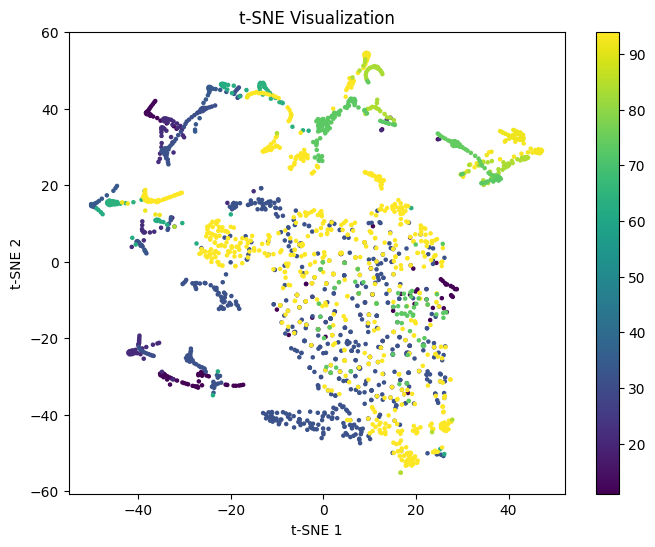

In [5]:
# Nếu nhãn là một mảng numpy, bạn có thể cần reshape nó thành (2073,)
labels = y_test.reshape(-1)

# Tạo đối tượng t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Áp dụng t-SNE lên dữ liệu
data_tsne = tsne.fit_transform(x_test.T)  # Chuyển vị của dữ liệu để có shape (2073, 5)

# Vẽ biểu đồ t-SNE với màu sắc dựa trên nhãn
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', s=5)
plt.colorbar(scatter)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


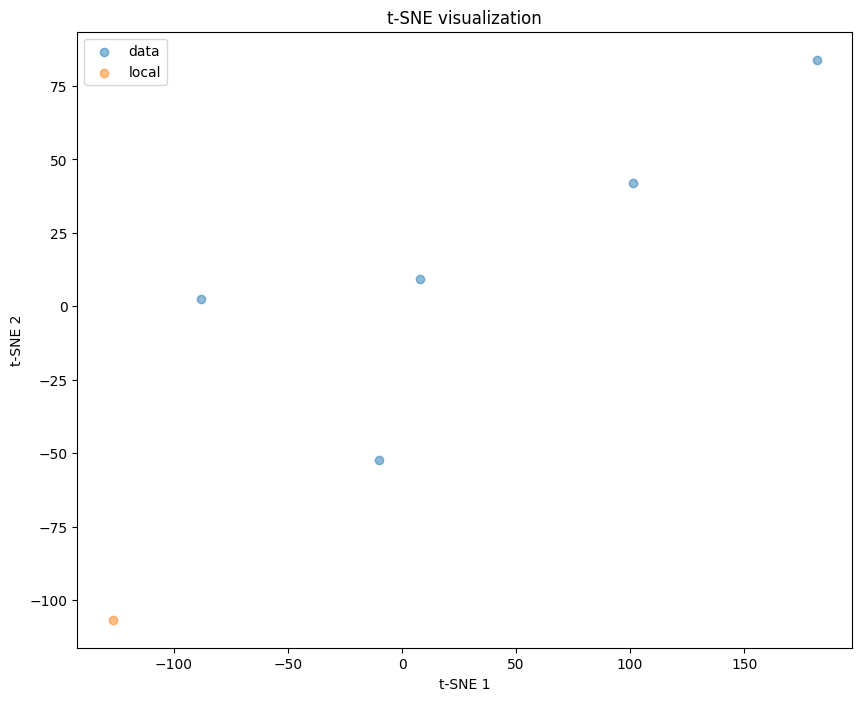

In [6]:
x_train_0=data_train['profile_data'].T[0][0]
y_train_0=data_train['profile_data'].T[1][0]
# Reshape dữ liệu 
x_train_reshaped = x_train_0.reshape(-1, 306 * 30)
y_train_reshaped = y_train_0.reshape(-1, 306 * 30)

# Tạo đối tượng t-SNE
data_combined = np.vstack((x_train_reshaped, y_train_reshaped))

# t-SNE
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
tsne_results = tsne.fit_transform(data_combined)

plt.figure(figsize=(10, 8))


plt.scatter(tsne_results[:5, 0], tsne_results[:5, 1], label='data', alpha=0.5)
plt.scatter(tsne_results[5:, 0], tsne_results[5:, 1], label='local', alpha=0.5)
plt.legend()
plt.title('t-SNE visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

#scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', s=5)
#plt.colorbar(scatter)
